# Estudio sobre la COVID-19 en México

## Parte 1 del proyecto 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 100

Descarga de los datos para su evaluación.

In [3]:
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")

archivo = "200504COVID19MEXICO.csv"
df = pd.read_csv(archivo, encoding = "ISO-8859-1")
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,04/05/2020,1ab4e5,2,3,25,2,25,25,6,2,06/04/2020,31/03/2020,10/04/2020,1,1,42,1,97,2,1,2,2,2,1,2,2,1,2,2,2,1,99,MÃ©xico,99,2
1,04/05/2020,0cc140,2,3,15,1,28,15,20,1,10/04/2020,05/04/2020,9999-99-99,97,2,61,1,2,2,2,2,2,2,1,2,2,2,2,2,1,1,99,MÃ©xico,99,97
2,04/05/2020,0e0689,2,3,27,1,27,27,4,1,13/04/2020,11/04/2020,9999-99-99,97,2,32,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,97
3,04/05/2020,1b81dc,2,3,2,1,8,2,4,1,13/04/2020,09/04/2020,9999-99-99,97,2,33,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,99,MÃ©xico,99,97
4,04/05/2020,0b7b4d,2,3,27,2,27,27,3,2,13/04/2020,05/04/2020,14/04/2020,2,1,63,1,97,2,2,2,2,2,1,2,2,1,1,2,2,1,99,MÃ©xico,99,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100041 entries, 0 to 100040
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  100041 non-null  object
 1   ID_REGISTRO          100041 non-null  object
 2   ORIGEN               100041 non-null  int64 
 3   SECTOR               100041 non-null  int64 
 4   ENTIDAD_UM           100041 non-null  int64 
 5   SEXO                 100041 non-null  int64 
 6   ENTIDAD_NAC          100041 non-null  int64 
 7   ENTIDAD_RES          100041 non-null  int64 
 8   MUNICIPIO_RES        100041 non-null  int64 
 9   TIPO_PACIENTE        100041 non-null  int64 
 10  FECHA_INGRESO        100041 non-null  object
 11  FECHA_SINTOMAS       100041 non-null  object
 12  FECHA_DEF            100041 non-null  object
 13  INTUBADO             100041 non-null  int64 
 14  NEUMONIA             100041 non-null  int64 
 15  EDAD                 100041 non-nu

In [5]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Clave Estado  36 non-null     int64 
 1   Estado        36 non-null     object
 2   Latitud       36 non-null     object
 3   Longitud      36 non-null     object
 4   Error         36 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [6]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Clave Estado     2501 non-null   float64
 1   Estado           2501 non-null   object 
 2   Clave Municipio  2501 non-null   float64
 3   Municipio        2501 non-null   object 
 4   Latitud          2502 non-null   float64
 5   Longitud         2502 non-null   object 
 6   Error            0 non-null      float64
dtypes: float64(4), object(3)
memory usage: 137.0+ KB


### 1. Descripción de los tres dataframe empleados: 

El dataset inicial cuenta con un total de 100 041 registros, repartidos en 35 columnas:

   - Datos personales de los pacientes: edad, sexo, lugar de residencia, origen, etc.

   - Datos sobre su estado de salud: enfermedades asociadas de forma negativa a la COVID-19.

   - Datos administrativos: unidad médica, localizaciones, etc.

De esas 35 columnas:

   - 4 contienen fechas: 3 de ellas son relevantes para estudiar la evolución de la enfermedad en el individuo y la cuarta permite seguir la evolución general de la pandemia en el país.

   - 12 hacen referencia al estado de salud previo del paciente: cada una representa básicamente una variable "dummy" con respuesta "sí" o "no", aunque en ocasiones cuentan con alguna opción más.

   - 8 contienen datos personales: este subgrupo es el más heterogéneo. Incluye datos de suma relevancia para nuestro análisis (como la edad y el sexo) y otros que parecen irrelevantes para los fines que perseguimos, como el hecho de que el paciente sea hablante de la lengua indígena o su calidad de migrante (no obstante, se entiende su utilización fuera del ámbito concreto de este proyecto).

El resto de la información corresponde a registros administrativos, incluidos la unidad médica y su sector, datos geográficos, el registro, etc.

El dataset de los estados incluye los datos geográficos de los mismos, repartidos en 36 registros y 5 columnas.

El dataset de municipios cuenta con 2502 registros repartidos en 7 columnas y, al igual que el de estados, solamente nos ofrece información geográfica, aunque con mayor detalle que el anterior.

Tras una primera evaluación, observamos la presencia de edades muy elevadas en el dataset y nos preocupa la posibilidad de que los datos estén sesgados. Por ello, procedemos a analizar la distribución de los registros en las edades por encima de los 75 años.  

In [7]:
covid_in = df[df['RESULTADO']==1]
covid_in.loc[covid_in['EDAD']>75,'EDAD'].value_counts().sort_index()

76     111
77     117
78     109
79     100
80      79
81      58
82      67
83      52
84      71
85      33
86      30
87      39
88      24
89      21
90      19
91      13
92       8
93       6
94       4
95       6
96       2
97       5
98       1
99       2
100      3
101      1
102      1
113      1
Name: EDAD, dtype: int64

Finalmente observamos que las edades más elevadas no se presentan con mucha frecuencia y se encuentran dentro de valores lógicos.

### 2. Selección de columnas pertinentes para el proyecto: 

Las variables que no vamos a tener en cuenta en este proyecto son las siguientes:

   - Lengua indígena
   - Entidad de nacionalidad
   - Migrante
   - País de nacionalidad

Esto se debe a que consideramos que, en principio, no tienen un papel relevante en la explicación del desarrollo de la enfermedad en México.

Procedemos a eliminarlas del dataset.


In [8]:
covid19 = covid_in.drop(['ENTIDAD_NAC', 'HABLA_LENGUA_INDIG', 'MIGRANTE', 'PAIS_NACIONALIDAD'], axis='columns')
covid19.shape

(24905, 31)

### 3. Cuatro informaciones importantes que podríamos obtener a través del análisis de los datos: 

1) Número de casos que han requerido ingreso en la UCI con respecto al total de los positivos.

2) Número de casos que han requerido ingreso en la UCI con patologías/condiciones previas.

3) Porcentaje de positivos fallecidos por edad; porcentaje de fallecidos por encima y por debajo de la mediana de la edad.

4) Porcentaje de fumadores entre los fallecidos por encima y por debajo de la mediana de la edad.

### 4. Cuatro gráficos que podríamos crear con la información antes señalada: 

1) Número de casos que han requerido ingreso en la UCI con respecto al total de los positivos.

In [9]:
positivos_uci=pd.DataFrame(df[(df["RESULTADO"]==1)&(df["UCI"].isin([1,2]))]["UCI"].value_counts())
positivos_uci.rename(columns={'UCI':'Positivos ingresados en la UCI'}, index={2:'No',1:'Sí'}, inplace=True)
positivos_uci

,Positivos ingresados en la UCI
No,8977
Sí,1015


C:\Users\ALCEA\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


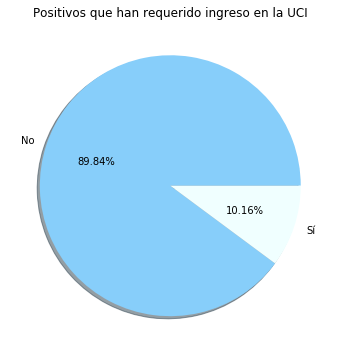

In [10]:
positivos_uci=pd.DataFrame(df[(df["RESULTADO"]==1)&(df["UCI"].isin([1,2]))]["UCI"].value_counts().values)
plt.figure(figsize=(10,6))
clases = 'No', 'Sí'
colores = ['lightskyblue','azure']
plt.title("Positivos que han requerido ingreso en la UCI")
plt.pie(positivos_uci, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')
plt.show()

2) Número de casos que han requerido ingreso en la UCI con patologías/condiciones previas.

In [11]:
positivos_enuci=pd.DataFrame(df[(df["RESULTADO"]==1)&(df["UCI"]==1)])
epoc=pd.DataFrame(positivos_enuci[(positivos_enuci["EPOC"].isin([1,2]))]["EPOC"].value_counts())
asma=pd.DataFrame(positivos_enuci[(positivos_enuci["ASMA"].isin([1,2]))]["ASMA"].value_counts())
diabetes=pd.DataFrame(positivos_enuci[(positivos_enuci["DIABETES"].isin([1,2]))]["DIABETES"].value_counts())
hipertensión=pd.DataFrame(positivos_enuci[(positivos_enuci["HIPERTENSION"].isin([1,2]))]["HIPERTENSION"].value_counts())
obesidad=pd.DataFrame(positivos_enuci[(positivos_enuci["OBESIDAD"].isin([1,2]))]["OBESIDAD"].value_counts())
tabaquismo=pd.DataFrame(positivos_enuci[(positivos_enuci["TABAQUISMO"].isin([1,2]))]["TABAQUISMO"].value_counts())
inmunosupresores=pd.DataFrame(positivos_enuci[(positivos_enuci["INMUSUPR"].isin([1,2]))]["INMUSUPR"].value_counts())
cardiovascular=pd.DataFrame(positivos_enuci[(positivos_enuci["CARDIOVASCULAR"].isin([1,2]))]["CARDIOVASCULAR"].value_counts())
renal_crónica=pd.DataFrame(positivos_enuci[(positivos_enuci["RENAL_CRONICA"].isin([1,2]))]["RENAL_CRONICA"].value_counts())
otras_enf=pd.DataFrame(positivos_enuci[(positivos_enuci["OTRA_COM"].isin([1,2]))]["OTRA_COM"].value_counts())
dolencias_previas=pd.DataFrame(pd.concat([epoc,asma,diabetes,hipertensión,obesidad,tabaquismo,inmunosupresores,cardiovascular,renal_crónica,otras_enf], axis=1))
dolencias_previas.rename(columns={'HIPERTENSION':'HIPERTENSIÓN','INMUSUPR':'INMUNOSUPRESIÓN','RENAL_CRONICA':'RENAL CRÓNICA','OTRA_COM':'OTRAS ENFERMEDADES'}, index={2:'No',1:'Sí'}, inplace=True)
dolencias_previas

,EPOC,ASMA,DIABETES,HIPERTENSIÓN,OBESIDAD,TABAQUISMO,INMUNOSUPRESIÓN,CARDIOVASCULAR,RENAL CRÓNICA,OTRAS ENFERMEDADES
No,947,964,662,638,697,906,973,948,958,947
Sí,50,31,339,364,306,92,25,51,40,51


In [12]:
epoc=positivos_enuci[(positivos_enuci["EPOC"].isin([1,2]))]["EPOC"].value_counts().values
asma=positivos_enuci[(positivos_enuci["ASMA"].isin([1,2]))]["ASMA"].value_counts().values
diabetes=positivos_enuci[(positivos_enuci["DIABETES"].isin([1,2]))]["DIABETES"].value_counts().values
hipertensión=positivos_enuci[(positivos_enuci["HIPERTENSION"].isin([1,2]))]["HIPERTENSION"].value_counts().values
obesidad=positivos_enuci[(positivos_enuci["OBESIDAD"].isin([1,2]))]["OBESIDAD"].value_counts().values
tabaquismo=positivos_enuci[(positivos_enuci["TABAQUISMO"].isin([1,2]))]["TABAQUISMO"].value_counts().values
inmunosupresores=positivos_enuci[(positivos_enuci["INMUSUPR"].isin([1,2]))]["INMUSUPR"].value_counts().values
cardiovascular=positivos_enuci[(positivos_enuci["CARDIOVASCULAR"].isin([1,2]))]["CARDIOVASCULAR"].value_counts().values
renal_crónica=positivos_enuci[(positivos_enuci["RENAL_CRONICA"].isin([1,2]))]["RENAL_CRONICA"].value_counts().values
otras_enf=positivos_enuci[(positivos_enuci["OTRA_COM"].isin([1,2]))]["OTRA_COM"].value_counts().values

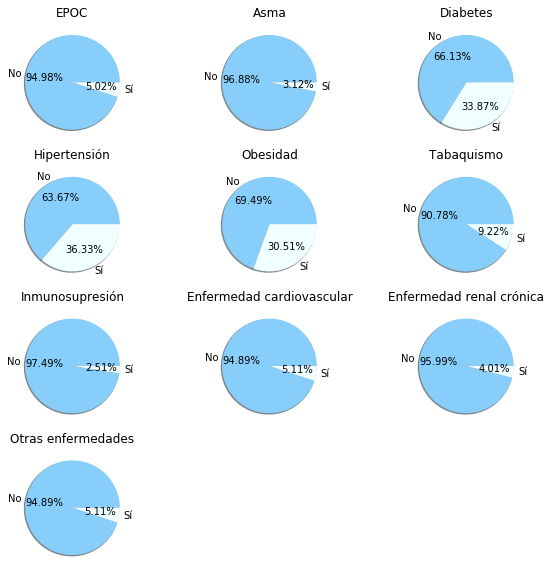

In [13]:
plt.figure(figsize=(10,10))
clases = 'No', 'Sí'
colores = ['lightskyblue','azure']
plt.subplot(4,3,1)  
plt.title("EPOC")
plt.pie(epoc, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')
plt.subplot(4,3,2)
plt.title("Asma")
plt.pie(asma, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')  
plt.subplot(4,3,3)
plt.title("Diabetes")
plt.pie(diabetes, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')
plt.subplot(4,3,4)
plt.title("Hipertensión")
plt.pie(hipertensión, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')
plt.subplot(4,3,5)
plt.title("Obesidad")
plt.pie(obesidad, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')
plt.subplot(4,3,6)
plt.title("Tabaquismo")
plt.pie(tabaquismo, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')
plt.subplot(4,3,7)
plt.title("Inmunosupresión")
plt.pie(inmunosupresores, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')
plt.subplot(4,3,8)
plt.title("Enfermedad cardiovascular")
plt.pie(cardiovascular, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')
plt.subplot(4,3,9)
plt.title("Enfermedad renal crónica")
plt.pie(renal_crónica, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')
plt.subplot(4,3,10)
plt.title("Otras enfermedades")
plt.pie(otras_enf, labels = clases, colors=colores ,shadow = True, explode = (0.0, 0.0), autopct = '%1.2f%%')
plt.show()

3) Porcentaje de positivos fallecidos por edad; porcentaje de fallecidos por encima y por debajo de la mediana de la edad.

In [14]:
covid19['FECHA_DEF'].value_counts()
fallecidos = covid19[covid19['FECHA_DEF']!='9999-99-99']
vivos = covid19[covid19['FECHA_DEF']=='9999-99-99']

In [15]:
covid19.loc[covid19['FECHA_DEF']=='9999-99-99', 'STATUS'] = 1
covid19.loc[covid19['FECHA_DEF']!='9999-99-99', 'STATUS'] = 0
covid19.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,PAIS_ORIGEN,UCI,STATUS
0,04/05/2020,1ab4e5,2,3,25,2,25,6,2,06/04/2020,31/03/2020,10/04/2020,1,1,42,1,97,1,2,2,2,1,2,2,1,2,2,2,1,99,2,0.0
1,04/05/2020,0cc140,2,3,15,1,15,20,1,10/04/2020,05/04/2020,9999-99-99,97,2,61,1,2,2,2,2,2,1,2,2,2,2,2,1,1,99,97,1.0
2,04/05/2020,0e0689,2,3,27,1,27,4,1,13/04/2020,11/04/2020,9999-99-99,97,2,32,1,2,2,2,2,2,2,2,2,2,2,2,2,1,99,97,1.0
3,04/05/2020,1b81dc,2,3,2,1,2,4,1,13/04/2020,09/04/2020,9999-99-99,97,2,33,1,2,2,2,2,2,2,2,2,2,2,2,1,1,99,97,1.0
4,04/05/2020,0b7b4d,2,3,27,2,27,3,2,13/04/2020,05/04/2020,14/04/2020,2,1,63,1,97,2,2,2,2,1,2,2,1,1,2,2,1,99,2,0.0


In [16]:
covid19['STATUS'].value_counts()

1.0    22635
0.0     2270
Name: STATUS, dtype: int64

In [17]:
covid19['STATUS'].value_counts(normalize=True)

1.0    0.908854
0.0    0.091146
Name: STATUS, dtype: float64

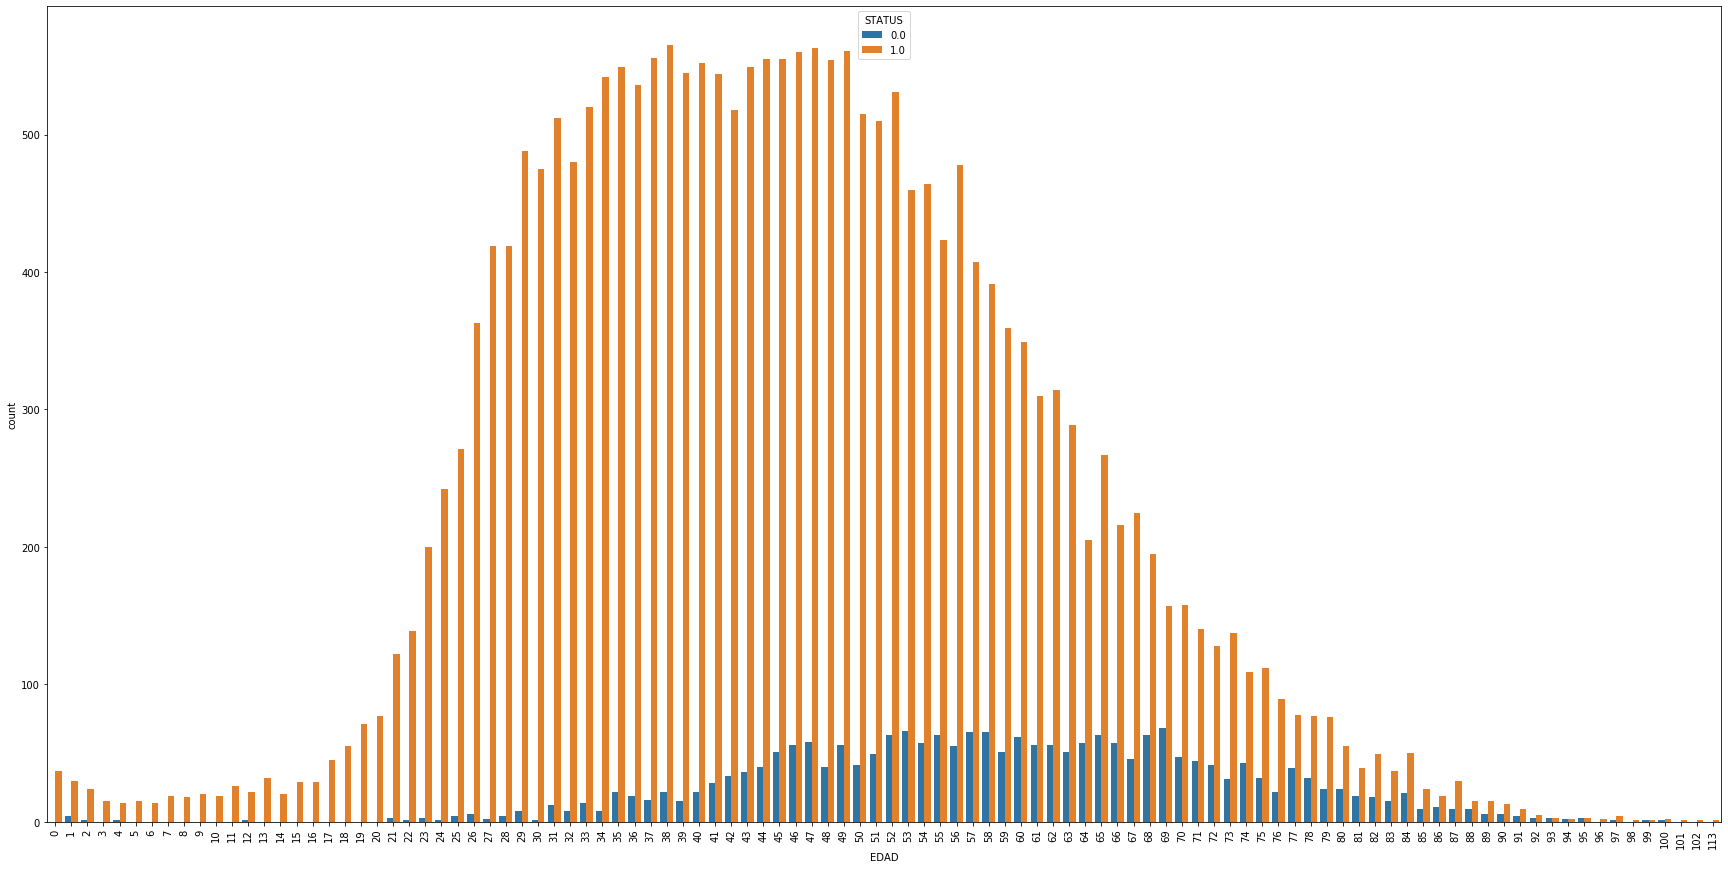

In [18]:
fig, ax = plt.subplots(figsize=(30,15))
chart = sns.countplot(covid19['EDAD'], hue=covid19['STATUS'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [19]:
mdn= round(np.median(covid19['EDAD'].unique()))
mdn

52.0

In [20]:
covid_m = covid19[covid19['EDAD'] > mdn]
covid_j = covid19[covid19['EDAD'] <= mdn]

[Text(0, 0, 'Fallecidos'), Text(0, 0, 'Vivos')]

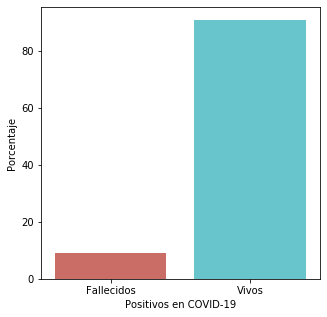

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
fx = sns.barplot(x= covid19['STATUS'], y=covid19['STATUS'] , estimator=lambda x: len(x) / len(covid19) * 100, palette='hls')
fx.set(xlabel = 'Positivos en COVID-19' , ylabel='Porcentaje')
fx.set_xticklabels(['Fallecidos', 'Vivos'])

[Text(0, 0, 'Fallecidos'), Text(0, 0, 'Vivos')]

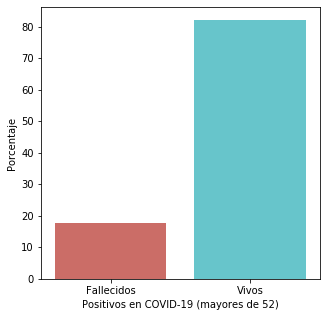

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
fx = sns.barplot(x= covid_m['STATUS'], y=covid_m['STATUS'] , estimator=lambda x: len(x) / len(covid_m) * 100, palette='hls')
fx.set(xlabel = 'Positivos en COVID-19 (mayores de 52)' , ylabel='Porcentaje')
fx.set_xticklabels(['Fallecidos', 'Vivos'])

[Text(0, 0, 'Fallecidos'), Text(0, 0, 'Vivos')]

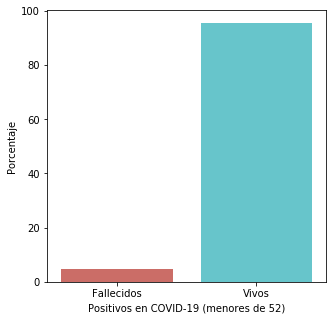

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
fx = sns.barplot(x= covid_j['STATUS'], y=covid_j['STATUS'] , estimator=lambda x: len(x) / len(covid_j) * 100, palette='hls')
fx.set(xlabel = 'Positivos en COVID-19 (menores de 52)' , ylabel='Porcentaje')
fx.set_xticklabels(['Fallecidos', 'Vivos'])

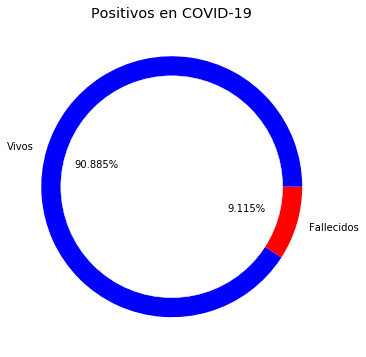

In [24]:
vivos=covid19[covid19['STATUS']==1].shape[0]
muertos=covid19[covid19['STATUS']!=1].shape[0]
pie_c =[vivos, muertos]
labels =['Vivos', 'Fallecidos']

fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('ggplot')
plt.pie(pie_c, labels=labels,colors=['blue','red'], autopct='%1.3f%%')
plt.title('Positivos en COVID-19')
my_circle=plt.Circle( (0,0), 0.85, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

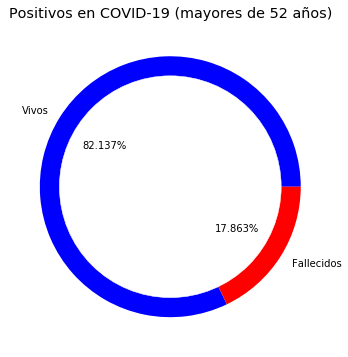

In [25]:
vivos=covid_m[covid_m['STATUS']==1].shape[0]
muertos=covid_m[covid_m['STATUS']!=1].shape[0]
pie_c =[vivos, muertos]
labels =['Vivos', 'Fallecidos']

fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('ggplot')
plt.pie(pie_c, labels=labels,colors=['blue','red'], autopct='%1.3f%%')
plt.title('Positivos en COVID-19 (mayores de 52 años)')
my_circle=plt.Circle( (0,0), 0.85, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

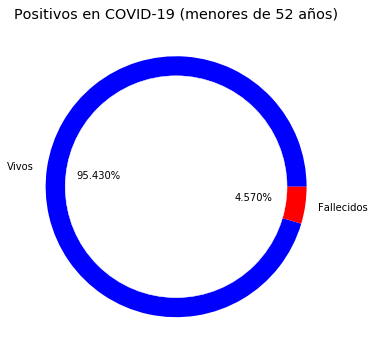

In [26]:
vivos=covid_j[covid_j['STATUS']==1].shape[0]
muertos=covid_j[covid_j['STATUS']!=1].shape[0]
pie_c =[vivos, muertos]
labels =['Vivos', 'Fallecidos']

fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('ggplot')
plt.pie(pie_c, labels=labels,colors=['blue','red'], autopct='%1.3f%%')
plt.title('Positivos en COVID-19 (menores de 52 años)')
my_circle=plt.Circle( (0,0), 0.85, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

4) Porcentaje de fumadores entre los fallecidos por encima y por debajo de la mediana de la edad.

Text(0.5, 1.0, 'Menores de 52')

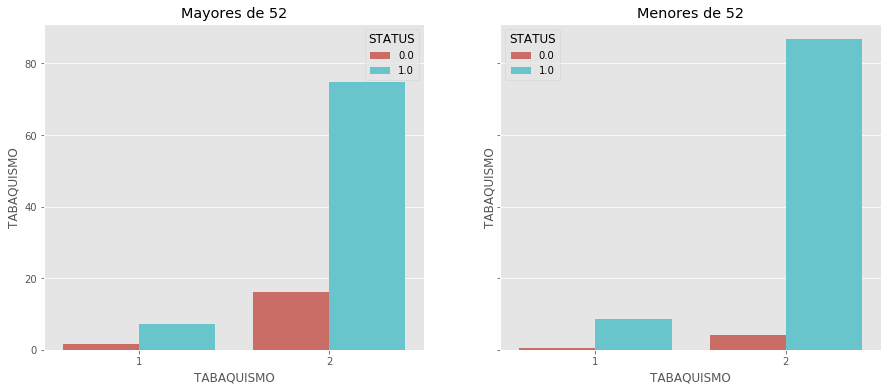

In [27]:
fig, ax = plt.subplots(1,2, figsize=(15,6), sharey=True)


tab_m = covid_m[covid_m['TABAQUISMO'].isin([1,2])]

sns.barplot(x=tab_m['TABAQUISMO'], y=tab_m['TABAQUISMO'],hue=tab_m['STATUS'], estimator=lambda x: len(x) / len(tab_m) * 100, palette='hls', ax=ax[0]).set_title('Mayores de 52')


#####################################################################################################################################################

tab_j = covid_j[covid_j['TABAQUISMO'].isin([1,2])]

sns.barplot(x=tab_j['TABAQUISMO'], y=tab_j['TABAQUISMO'],hue=tab_j['STATUS'], estimator=lambda x: len(x) / len(tab_j) * 100, palette='hls', ax=ax[1]).set_title('Menores de 52')

### 5. Objetivos que buscamos al determinar y representar gráficamente la información antes señalada: 

1) Número de casos que han requerido ingreso en la UCI con respecto al total de los positivos.

Objetivo: calcular las probabilidades de que la enfermedad desemboque en una situación de gravedad. 

2) Número de casos que han requerido ingreso en la UCI con patologías/condiciones previas.

Objetivo: determinar la influencia del estado de salud del paciente previo en el nivel de gravedad de la enfermedad.

3) Porcentaje de positivos fallecidos por edad; porcentaje de positivos fallecidos por encima y por debajo de la mediana de la edad.

Objetivo: determinar la influencia de la edad en las probabilidades de que la enfermedad acabe con la vida del paciente. 

4) Porcentaje de fumadores entre los positivos fallecidos por encima y por debajo de la mediana de la edad.

Objetivo: determinar la influencia del tabaco, asociada a la de la edad, en las probabilidades de que la enfermedad acabe con la vida del paciente.